In [19]:
import pandas as pd
import seaborn as sns
from isocodes import countries

pd.set_option('display.max_columns', 26) # show all columns in the output
sns.set_theme() # seaborn styling
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [2]:
df = pd.read_csv('WVS_Cross-National_Wave_7_csv_v6_0.csv',
                 sep=',',
                 usecols=[ # Because the dataset is huge, just import the following columns:
                     "A_YEAR", "B_COUNTRY_ALPHA", "J_INTDATE", # "A_STUDY", "A_WAVE", Metadaten des Interviews für die Auswertung
                     "G_TOWNSIZE", "G_TOWNSIZE2", "H_SETTLEMENT", "H_URBRURAL", # 
                     "Q5", "Q6", "Q7", "Q8", "Q9", "Q43", "Q44", # Social Values, Norms, Stereotypes
                     "Q66", "Q67", "Q75", "Q77", "Q82", # Social Capital, Trust and Organizational Memberships
                     "Q107", "Q108", "Q110", # Economic values
                     "Q122", # Migration
                     "Q235", # ... Political Culture and Political Regimes 
                ],
                dtype={'B_COUNTRY_ALPHA': 'category'} # just overriding this as everything else is correctly detected automatically by Pandas
)
df.rename(columns={
        "A_YEAR": "interview_year",
        "J_INTDATE": "interview_date",
        "B_COUNTRY_ALPHA": "country_iso",
        "G_TOWNSIZE": "townsize",
        "G_TOWNSIZE2": "townsize_2",
        "H_SETTLEMENT": "settlement",
        "H_URBRURAL": "urban_rural"
    },
    inplace=True
)

df.sample(n=10, random_state=2024)

,interview_year,country_iso,interview_date,townsize,townsize_2,settlement,urban_rural,Q5,Q6,Q7,Q8,Q9,Q43,Q44,Q66,Q67,Q75,Q77,Q82,Q107,Q108,Q110,Q122,Q235
17813,2018,CHN,20180807,7,4,4,1,2,3,1,1,1,3,1,2,2,2,2,-4,4,4,5,0,2
35755,2018,IDN,20180604,2,1,5,2,1,1,1,2,2,1,2,3,3,1,3,3,8,7,7,0,4
27223,2022,GBR,20220526,7,4,2,1,2,4,1,2,2,1,1,3,3,1,4,4,5,3,6,2,1
76962,2020,SGP,-4,8,5,1,1,2,1,1,2,1,1,2,3,3,3,3,2,4,5,4,2,1
37488,2023,IND,20230609,6,3,3,1,1,1,1,1,1,3,1,4,4,2,4,2,1,-1,-1,0,-1
72202,2018,PRI,20180803,5,3,4,1,2,1,2,2,1,3,1,3,3,3,3,3,5,5,1,1,4
6214,2018,BGD,20181217,5,3,2,2,1,1,1,2,1,3,1,2,2,1,1,1,5,4,3,2,4
28422,2022,GBR,20220829,7,4,3,1,2,4,2,1,1,1,2,4,4,3,4,3,5,1,5,2,3
69886,2018,PER,20180904,1,1,5,2,1,1,2,2,1,1,1,2,2,2,2,2,7,7,6,0,2
90239,2017,USA,20170502,8,5,3,1,2,3,2,1,1,1,1,3,3,2,3,3,5,1,7,0,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97220 entries, 0 to 97219
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   interview_year  97220 non-null  int64   
 1   country_iso     97220 non-null  category
 2   interview_date  97220 non-null  int64   
 3   townsize        97220 non-null  int64   
 4   townsize_2      97220 non-null  int64   
 5   settlement      97220 non-null  int64   
 6   urban_rural     97220 non-null  int64   
 7   Q5              97220 non-null  int64   
 8   Q6              97220 non-null  int64   
 9   Q7              97220 non-null  int64   
 10  Q8              97220 non-null  int64   
 11  Q9              97220 non-null  int64   
 12  Q43             97220 non-null  int64   
 13  Q44             97220 non-null  int64   
 14  Q66             97220 non-null  int64   
 15  Q67             97220 non-null  int64   
 16  Q75             97220 non-null  int64   
 17  Q77         

### For further analysis: how many interviews conducted per country?

In [4]:
no_of_interviews_per_country = df.value_counts(subset=["country_iso"]).reset_index() # get answers as DAtaFrame instead of Series

no_of_interviews_per_country["country_name"] = no_of_interviews_per_country.apply(
    lambda x: countries.get(alpha_3=x["country_iso"])["name"] if countries.get(alpha_3=x["country_iso"]) else None,
    axis=1
)
no_of_interviews_per_country


,country_iso,count,country_name
0,CAN,4018,Canada
1,IDN,3200,Indonesia
2,CHN,3036,China
3,GBR,2609,United Kingdom
4,USA,2596,United States
...,...,...,...
61,ARG,1003,Argentina
62,URY,1000,Uruguay
63,CYP,1000,Cyprus
64,CHL,1000,Chile


In [5]:
no_of_interviews_per_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   country_iso   66 non-null     category
 1   count         66 non-null     int64   
 2   country_name  65 non-null     object  
dtypes: category(1), int64(1), object(1)
memory usage: 3.8+ KB


# Economy
Additional data used:
- [IMF. (2024). Die 20 Länder mit dem größten Bruttoinlandsprodukt (BIP) pro Kopf im Jahr 2023 (in US-Dollar). Statista. Statista GmbH. Zugriff: 17. Juni 2024. https://de.statista.com/statistik/daten/studie/166224/umfrage/ranking-der-20-laender-mit-dem-groessten-bruttoinlandsprodukt-pro-kopf/][1]
- [World Bank (2023) – with minor processing by Our World in Data. “GDP per capita – World Bank – In constant 2017 international $” [dataset]. World Bank, “World Bank World Development Indicators” [original data]. Retrieved June 18, 2024 from https://ourworldindata.org/grapher/gdp-per-capita-worldbank][2]

[1]: https://de.statista.com/statistik/daten/studie/166224/umfrage/ranking-der-20-laender-mit-dem-groessten-bruttoinlandsprodukt-pro-kopf/
[2]: https://ourworldindata.org/grapher/gdp-per-capita-worldbank

In [6]:
df_gdp_per_capita = pd.read_csv("gdp-per-capita-worldbank.csv",
                 sep=",",
                 names=[
                     "country_name", "country_iso", "year", "gdp_per_capita"
                 ],
                 header=0,
                 dtype={
                     "country_name": "category",
                     "country_iso": "category"
                    } # just overriding this as everything else is correctly detected automatically by Pandas
)
df_gdp_per_capita

,country_name,country_iso,year,gdp_per_capita
0,Afghanistan,AFG,2002,1280.4631
1,Afghanistan,AFG,2003,1292.3335
2,Afghanistan,AFG,2004,1260.0605
3,Afghanistan,AFG,2005,1352.3207
4,Afghanistan,AFG,2006,1366.9932
...,...,...,...,...
6557,Zimbabwe,ZWE,2018,2399.6216
6558,Zimbabwe,ZWE,2019,2203.3967
6559,Zimbabwe,ZWE,2020,1990.3195
6560,Zimbabwe,ZWE,2021,2115.1445


In [7]:
df_gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6562 entries, 0 to 6561
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   country_name    6562 non-null   category
 1   country_iso     6133 non-null   category
 2   year            6562 non-null   int64   
 3   gdp_per_capita  6562 non-null   float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 135.5 KB


In [8]:
# There are rows where country_iso is null, so after short look into the CSV,
# Drop rows for regions (e.g. EU) without iso_code
df_gdp_per_capita.dropna(axis=0, inplace=True)
df_gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6133 entries, 0 to 6561
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   country_name    6133 non-null   category
 1   country_iso     6133 non-null   category
 2   year            6133 non-null   int64   
 3   gdp_per_capita  6133 non-null   float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 174.9 KB


In [9]:
# Select most recent data of the dataset (2022)
df_gdp_per_capita = df_gdp_per_capita.loc[df_gdp_per_capita["year"]==2022,:]
df_gdp_per_capita

,country_name,country_iso,year,gdp_per_capita
52,Albania,ALB,2022,15492.0670
85,Algeria,DZA,2022,11198.2330
118,Angola,AGO,2022,5906.1157
151,Antigua and Barbuda,ATG,2022,22321.8700
184,Argentina,ARG,2022,22461.4410
...,...,...,...,...
6429,Vanuatu,VUT,2022,2785.9038
6462,Vietnam,VNM,2022,11396.5310
6495,World,OWID_WRL,2022,17527.1900
6528,Zambia,ZMB,2022,3365.8738


In [10]:
# Answers that have a value of <0 are of type "Don't know", "No answer", "Not asked", "Missing / N/A"
# We will exlude them in the further analysis
q5_filtered_df = df.loc[(df["Q44"] > 0) & (df["Q5"] > 0), :]

In [11]:
q5_description = q5_filtered_df.groupby(by="country_iso").describe()["Q5"]
q5_description


/var/folders/zh/k90j5mv93w73_x19yl4m25sw0000gn/T/ipykernel_47831/2103989953.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q5_description = q5_filtered_df.groupby(by="country_iso").describe()["Q5"]


,count,mean,std,min,25%,50%,75%,max
country_iso,,,,,,,,
AND,997.0,1.527583,0.703185,1.0,1.0,1.0,2.0,4.0
ARG,955.0,1.475393,0.680803,1.0,1.0,1.0,2.0,4.0
ARM,1186.0,1.341484,0.704835,1.0,1.0,1.0,1.0,4.0
AUS,1700.0,1.998824,0.907751,1.0,1.0,2.0,2.0,4.0
BGD,1145.0,1.225328,0.483889,1.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...
USA,2565.0,1.856530,0.847407,1.0,1.0,2.0,2.0,4.0
UZB,1235.0,1.531984,0.700478,1.0,1.0,1.0,2.0,4.0
VEN,1190.0,1.442857,0.676168,1.0,1.0,1.0,2.0,4.0


In [12]:
economy_analysis_df = df_gdp_per_capita.join(q5_description, on="country_iso").dropna()
economy_analysis_df.sample(10)

,country_name,country_iso,year,gdp_per_capita,count,mean,std,min,25%,50%,75%,max
4305,Nicaragua,NIC,2022,5822.3535,1200.0,1.336667,0.535625,1.0,1.0,1.0,2.0,4.0
4719,Peru,PER,2022,12743.9420,1368.0,1.321637,0.538550,1.0,1.0,1.0,2.0,4.0
3836,Mexico,MEX,2022,20254.7810,1720.0,1.312209,0.702088,1.0,1.0,1.0,1.0,4.0
3033,Kenya,KEN,2022,4881.5317,1250.0,1.140800,0.462544,1.0,1.0,1.0,1.0,4.0
2741,Iran,IRN,2022,15461.0790,1477.0,1.272173,0.574165,1.0,1.0,1.0,1.0,4.0
5246,Serbia,SRB,2022,20885.8890,961.0,1.744017,0.883311,1.0,1.0,2.0,2.0,4.0
1249,Colombia,COL,2022,15616.7520,1520.0,1.317763,0.566523,1.0,1.0,1.0,2.0,4.0
1922,Ethiopia,ETH,2022,2381.1658,1191.0,1.097397,0.313159,1.0,1.0,1.0,1.0,4.0
217,Armenia,ARM,2022,16057.0070,1186.0,1.341484,0.704835,1.0,1.0,1.0,1.0,4.0
6462,Vietnam,VNM,2022,11396.5310,1200.0,1.359167,0.607295,1.0,1.0,1.0,2.0,4.0


In [13]:
# Our analysis focuses on these countries:
selected_countries = [
    "ARG", "USA", "ARM", "UZB", "DEU", "ZWE", "VNM", "GRC"
]
economy_analysis_df = economy_analysis_df.loc[economy_analysis_df["country_iso"].isin(selected_countries), :]
economy_analysis_df

,country_name,country_iso,year,gdp_per_capita,count,mean,std,min,25%,50%,75%,max
184,Argentina,ARG,2022,22461.4410,955.0,1.475393,0.680803,1.0,1.0,1.0,2.0,4.0
217,Armenia,ARM,2022,16057.0070,1186.0,1.341484,0.704835,1.0,1.0,1.0,1.0,4.0
2219,Germany,DEU,2022,53969.6250,1441.0,1.795975,0.876394,1.0,1.0,2.0,2.0,4.0
2285,Greece,GRC,2022,31704.4260,1111.0,1.357336,0.634686,1.0,1.0,1.0,2.0,4.0
6297,United States,USA,2022,64623.1250,2565.0,1.856530,0.847407,1.0,1.0,2.0,2.0,4.0
6396,Uzbekistan,UZB,2022,8073.2104,1235.0,1.531984,0.700478,1.0,1.0,1.0,2.0,4.0
6462,Vietnam,VNM,2022,11396.5310,1200.0,1.359167,0.607295,1.0,1.0,1.0,2.0,4.0
6561,Zimbabwe,ZWE,2022,2207.9570,1211.0,1.134600,0.386829,1.0,1.0,1.0,1.0,4.0


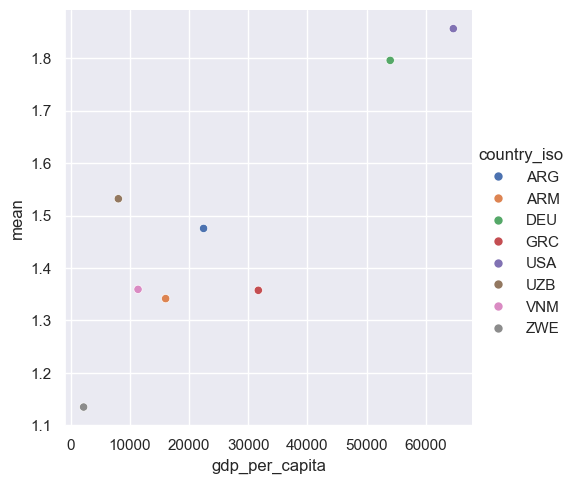

In [21]:

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="gdp_per_capita",
            y="mean",
            hue="country_iso",
            sizes=(40, 400),
            data=economy_analysis_df
)